In [1]:
from ray.tune.schedulers import PopulationBasedTraining
from ray import tune, air
from ray.rllib.policy.policy import PolicySpec
from ray.rllib.algorithms.ppo import PPO, PPOConfig
from ray.rllib.algorithms.callbacks import DefaultCallbacks
from bmstestbedc2f2.envs import _TODO_MultiAgentBuildingEnv, MultiAgentBuildingEnv
from bmstestbedc2f2.utils import resolve_path
import numpy as np

pbt = PopulationBasedTraining(
    time_attr="training_iteration",
    perturbation_interval=4,
    resample_probability=0.25,
    hyperparam_mutations={
        "lr": tune.uniform(1e-5, 0.1),
        "batch_mode": ["complete_episodes"],
        "train_batch_size": [4608],
        "sgd_minibatch_size": [32, 64, 128, 256, 512],
        "num_sgd_iter": [10, 20, 30],
        "clip_param": tune.uniform(0.1, 0.3),
    },
)

tuner = tune.Tuner(
    PPO,
    param_space=(
        _TODO_MultiAgentBuildingEnv.get_algo_config(
            PPOConfig()
            .api_stack(
                enable_rl_module_and_learner=False,
                enable_env_runner_and_connector_v2=False,
            )
            .rollouts(
                sample_timeout_s=60,
                #num_env_runners=1, 
                rollout_fragment_length='auto',
                # rollout_fragment_length=200,
            )
            #.resources(num_gpus=1.)
            # .callbacks(
            #     MyCallbacks
            # )
            ,
            env_config=dict(
                bms_system='energyplus',
            ),
        )
    ),
    tune_config=tune.TuneConfig(
        #reuse_actors=True,
        scheduler=pbt,
        num_samples=1,
        metric="env_runners/episode_reward_mean",
        mode="max",
    ),
    run_config=air.RunConfig(
        stop={"training_iteration": 4},
        checkpoint_config=air.CheckpointConfig(
            checkpoint_at_end=True
        ),
        verbose=2,
    )
)
results = tuner.fit()

/home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-02-13 15:56:11,749	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-02-13 15:56:12,047	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-02-13 15:56:19,743	WARNING deprecation.py:50 -- DeprecationWarning: `rollouts` has been deprecated. Use `AlgorithmConfig.env_runners(..)` instead. This will raise an error in the future!
/home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/ray/_private/node.py:1362: ResourceWarning: unclosed file <_io.TextIOWrapper name='/tmp/ray/session_2025-02-13_15-56-19_781229_

(RolloutWorker pid=1019056) /usr/lib/python3.11/tempfile.py:1043: ResourceWarning: Implicitly cleaning up <TemporaryDirectory '/tmp/.energyplus_output_y6tkpul0'>
(RolloutWorker pid=1019056)   _warnings.warn(warn_message, ResourceWarning)
(RolloutWorker pid=1019056) /usr/lib/python3.11/tempfile.py:1043: ResourceWarning: Implicitly cleaning up <TemporaryDirectory '/tmp/.energyplus_output_l851shfy'>
(RolloutWorker pid=1019056)   _warnings.warn(warn_message, ResourceWarning)
(PPO pid=1018931) Install gputil for GPU system monitoring.
(RolloutWorker pid=1019056) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/controllables/energyplus/variables.py:396: RuntimeWarning: OutputVariable(OutputVariable.Ref(type='Zone Mean Air Temperature', key='1FFIRSTFLOORWEST:OPENOFFICE')) requested while Kernel() is running; It may not be available until the next run. More info: https://energyplus.readthedocs.io/en/latest/datatransfer.html#datatransfer.DataExchange.request_variable
(Rollout

Trial name,agent_timesteps_total,counters,custom_metrics,env_runners,episode_media,num_agent_steps_sampled,num_agent_steps_sampled_lifetime,num_agent_steps_trained,num_env_steps_sampled,num_env_steps_sampled_lifetime,num_env_steps_sampled_this_iter,num_env_steps_sampled_throughput_per_sec,num_env_steps_trained,num_env_steps_trained_this_iter,num_env_steps_trained_throughput_per_sec,num_healthy_workers,num_in_flight_async_sample_reqs,num_remote_worker_restarts,num_steps_trained_this_iter,perf,timers
PPO__TODO_MultiAgentBuildingEnv_1238a_00000,128000,"{'num_env_steps_sampled': 16000, 'num_env_steps_trained': 16000, 'num_agent_steps_sampled': 128000, 'num_agent_steps_trained': 128000}",{},"{'episode_reward_max': -4382890134.332373, 'episode_reward_min': -4396438572.184208, 'episode_reward_mean': -4389664353.25829, 'episode_len_mean': 4608.0, 'episode_media': {}, 'episodes_timesteps_total': 9216, 'policy_reward_min': {'ART-01-13': -1885297.3224805295, 'ART-01-07': -263750412.1566586, 'ART-01-09': -4010153223.356084, 'ART-01-10': -33557935.86711996, 'ART-01-08': -55544458.07587301, 'ART-01-12': -4171738.6947006797, 'ART-01-11a': -2510669.7899234695, 'ART-01-14': -24864836.92136123}, 'policy_reward_max': {'ART-01-13': -1809229.9037082803, 'ART-01-07': -263072534.70809978, 'ART-01-09': -3998032119.2954593, 'ART-01-10': -33143901.05002687, 'ART-01-08': -55517770.37405265, 'ART-01-12': -4151061.199755159, 'ART-01-11a': -2506653.9101135987, 'ART-01-14': -24656863.891155913}, 'policy_reward_mean': {'ART-01-13': -1847263.6130944048, 'ART-01-07': -263411473.4323792, 'ART-01-09': -4004092671.3257713, 'ART-01-10': -33350918.458573416, 'ART-01-08': -55531114.22496283, 'ART-01-12': -4161399.9472279195, 'ART-01-11a': -2508661.850018534, 'ART-01-14': -24760850.406258572}, 'custom_metrics': {}, 'hist_stats': {'episode_reward': [-4396438572.184208, -4382890134.332373], 'episode_lengths': [4608, 4608], 'policy_ART-01-13_reward': [-1885297.3224805295, -1809229.9037082803], 'policy_ART-01-07_reward': [-263750412.1566586, -263072534.70809978], 'policy_ART-01-09_reward': [-4010153223.356084, -3998032119.2954593], 'policy_ART-01-10_reward': [-33557935.86711996, -33143901.05002687], 'policy_ART-01-08_reward': [-55544458.07587301, -55517770.37405265], 'policy_ART-01-12_reward': [-4171738.6947006797, -4151061.199755159], 'policy_ART-01-11a_reward': [-2510669.7899234695, -2506653.9101135987], 'policy_ART-01-14_reward': [-24864836.92136123, -24656863.891155913]}, 'sampler_perf': {'mean_raw_obs_processing_ms': 0.8464456597632942, 'mean_inference_ms': 4.987956523418585, 'mean_action_processing_ms': 0.5351457743595458, 'mean_env_wait_ms': 11.842452379434516, 'mean_env_render_ms': 0.0}, 'num_faulty_episodes': 0, 'connector_metrics': {}, 'num_episodes': 0, 'episode_return_max': -4382890134.332373, 'episode_return_min': -4396438572.184208, 'episode_return_mean': -4389664353.25829, 'episodes_this_iter': 0}",{},128000,128000,128000,16000,16000,4000,67.5614,16000,4000,67.5614,2,0,0,4000,"{'cpu_util_percent': 8.785882352941178, 'ram_util_percent': 54.60000000000003}","{'training_iteration_time_ms': 64859.587, 'restore_workers_time_ms': 0.012, 'training_step_time_ms': 64859.548, 'sample_time_ms': 35473.65, 'learn_time_ms': 29380.23, 'learn_throughput': 136.146, 'synch_weights_time_ms': 5.374}"


(RolloutWorker pid=1019057) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 24x across cluster]
(RolloutWorker pid=1019057)   gym.logger.warn("Casting input x to numpy array.") [repeated 24x across cluster]
(RolloutWorker pid=1019057) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 192x across cluster]
(RolloutWorker pid=1019057)   gym.logger.warn("Casting input x to numpy array.") [repeated 192x across cluster]
(RolloutWorker pid=1019057) /home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/gymnasium/spaces/box.py:230: UserWarning: WARN: Casting input x to numpy array. [repeated 192x across cluster]
(RolloutWorker pid=1019057)   gym.logger.warn("Casting input x to numpy array.") [repeated 192x across cluster]
(RolloutWorker pid=1019057) /home/AD/user/lab

In [2]:
best_result = results.get_best_result()
best_result.checkpoint.to_directory(resolve_path('algo_checkpoint'))
best_result

Result(
  metrics={'custom_metrics': {}, 'episode_media': {}, 'info': {'learner': {'ART-01-09': {'learner_stats': {'allreduce_latency': 0.0, 'grad_gnorm': 1.0396375169822325, 'cur_kl_coeff': 0.10000000000000002, 'cur_lr': 5.0000000000000016e-05, 'total_loss': 9.96501384774844, 'policy_loss': -0.001333507003437262, 'vf_loss': 9.966020771861077, 'vf_explained_var': -2.5828679402669272e-08, 'kl': 0.003265883695274855, 'entropy': 1.507012025763591, 'entropy_coeff': 0.0}, 'model': {}, 'custom_metrics': {}, 'num_agent_steps_trained': 125.0, 'num_grad_updates_lifetime': 3360.5, 'diff_num_grad_updates_vs_sampler_policy': 479.5}, 'ART-01-13': {'learner_stats': {'allreduce_latency': 0.0, 'grad_gnorm': 0.6959651087915214, 'cur_kl_coeff': 0.025000000000000005, 'cur_lr': 5.0000000000000016e-05, 'total_loss': 9.967622900009156, 'policy_loss': -0.00029281930207313657, 'vf_loss': 9.96783463259538, 'vf_explained_var': -2.034356196721395e-05, 'kl': 0.003243317696709803, 'entropy': 1.4700575883189837, 'e

In [3]:
from ray.rllib.algorithms.ppo import PPO, PPOConfig
from ray.rllib.algorithms.callbacks import DefaultCallbacks
from controllables.core.tools.records import VariableRecords
from controllables.core import TemporaryUnavailableError
import pandas as pd
from bmstestbedc2f2.envs import _TODO_MultiAgentBuildingEnv, MultiAgentBuildingEnv
from bmstestbedc2f2.utils import resolve_path

class PlottingCallbacks(DefaultCallbacks):
    def __init__(self):
        self.env_records: dict[object, VariableRecords] = None

    def on_episode_start(self, *, episode, worker, **kwargs):
        env: _TODO_MultiAgentBuildingEnv = worker.env
        system = env.system
        if self.env_records is None:
            self.env_records = dict()
            for zone_id in env.agents:
                self.env_records[zone_id] = records = VariableRecords({
                    'time': system['time'],
                    'reward': env.agents[zone_id].reward,
                    'temperature:thermostat': env.agents[zone_id].action['temperature:thermostat'],
                    'temperature:userpref': system[(zone_id, 'temperature:userpref')],
                    'temperature': env.agents[zone_id].observation['temperature'],
                    'load_ahu': env.agents[zone_id].observation['load:ahu'],
                })

    def on_episode_step(self, *, episode, **kwargs):
        for _, env_records in self.env_records.items():
            env_records.poll()

    def on_episode_end(self, *, episode, **kwargs):
        for zone_id, env_records in self.env_records.items():
            env_records.dataframe().to_csv(f'results/{zone_id}.csv', index=False)

algo_eval = PPO(
    _TODO_MultiAgentBuildingEnv.get_algo_config(
        PPOConfig()
        .env_runners(
            # NOTE this env (an `ExternalEnv`) does not support connectors
            enable_connectors=False,
            # disable distributed workers for local plotting
            num_rollout_workers=0,
            create_env_on_local_worker=True,
        )
        .evaluation(
            evaluation_num_workers=0,
        )
        .callbacks(PlottingCallbacks),
        env_config=dict(
            bms_system='energyplus',
        ),
    )
)
algo_eval.restore(resolve_path('algo_checkpoint'))
algo_eval.evaluate()

2025-02-13 16:00:58,880	WARNING deprecation.py:50 -- DeprecationWarning: `AlgorithmConfig.env_runners(num_rollout_workers)` has been deprecated. Use `AlgorithmConfig.env_runners(num_env_runners)` instead. This will raise an error in the future!
2025-02-13 16:00:58,880	WARNING deprecation.py:50 -- DeprecationWarning: `AlgorithmConfig.evaluation(evaluation_num_workers=..)` has been deprecated. Use `AlgorithmConfig.evaluation(evaluation_num_env_runners=..)` instead. This will raise an error in the future!
/home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/ray/rllib/algorithms/algorithm.py:568: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
`UnifiedLogger` will be removed in Ray 2.7.
  return UnifiedLogger(config, logdir, loggers=None)
/home/AD/user/lab/bmstestbedc2f2/.venv/lib/python3.11/site-packages/ray/tune/logger/unified.py:53: 

{'env_runners': {'episode_reward_max': -4374451515.701932,
  'episode_reward_min': -4412652466.774468,
  'episode_reward_mean': -4386007485.233545,
  'episode_len_mean': 4608.0,
  'episode_media': {},
  'episodes_timesteps_total': 36864,
  'policy_reward_min': {'ART-01-08': -55876491.1840809,
   'ART-01-09': -4025671559.085647,
   'ART-01-07': -264541791.6127284,
   'ART-01-14': -24966579.95204092,
   'ART-01-10': -33288304.53830257,
   'ART-01-11a': -2519985.873533478,
   'ART-01-13': -1917220.526721668,
   'ART-01-12': -4180963.2587384214},
  'policy_reward_max': {'ART-01-08': -55320010.561767764,
   'ART-01-09': -3990167070.9157805,
   'ART-01-07': -262287229.04121754,
   'ART-01-14': -24696501.567730714,
   'ART-01-10': -32908653.0521144,
   'ART-01-11a': -2495543.9611425754,
   'ART-01-13': -1785902.8550246048,
   'ART-01-12': -4156400.646157813},
  'policy_reward_mean': {'ART-01-08': -55499151.641230986,
   'ART-01-09': -4000888831.7727985,
   'ART-01-07': -263165259.5604568,
   

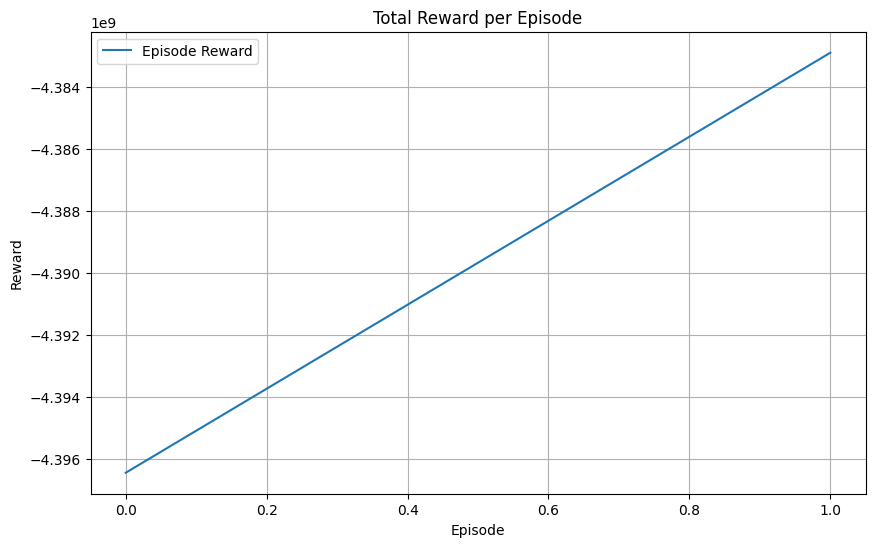

In [4]:
import matplotlib.pyplot as plt
best_result = results.get_best_result().metrics
episode_reward = best_result['env_runners']['hist_stats']['episode_reward']
episodes = list(range(len(episode_reward)))
plt.figure(figsize=(10, 6))
plt.plot(episodes, episode_reward, linestyle='-', label='Episode Reward')
plt.title('Total Reward per Episode')
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.grid(True)
plt.legend()
plt.show()

In [5]:
import os
import pandas as pd

results_dir = '/home/AD/user/lab/bmstestbedc2f2/packages/bmstestbedc2f2_notebooks/results'
csv_files = [f for f in os.listdir(results_dir) if f.endswith('.csv')]

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# 指定 CSV 文件所在目录（每个 CSV 对应一个房间）
results_dir = '/home/AD/user/lab/bmstestbedc2f2/packages/bmstestbedc2f2_notebooks/results'
csv_files = [f for f in os.listdir(results_dir) if f.endswith('.csv')]

for csv_file in csv_files:
    room_id = os.path.splitext(csv_file)[0]
    file_path = os.path.join(results_dir, csv_file)
    df = pd.read_csv(file_path)
    df['time'] = pd.to_datetime(df['time'],format='mixed')
    # ---------------------------
    # 第一张图：Reward vs Time
    plt.figure(figsize=(14, 8))
    plt.plot(df['time'], df['reward'], label='Reward', color='blue')
    plt.xlabel('Time')
    plt.ylabel('Reward')
    plt.title(f'{room_id}: Reward vs Time')
    plt.grid(True)
    # 保存 Reward 图
    reward_fig_path = os.path.join(results_dir, f'{room_id}_reward.jpg')
    plt.savefig(reward_fig_path, dpi=600)
    plt.close()  # 关闭当前图形，释放内存
    
    # ---------------------------
    # 第二张图：温度数据 vs Time
    plt.figure(figsize=(14, 8))
    plt.plot(df['time'], df['temperature:thermostat'], label='Temperature: Thermostat', color='red')
    plt.plot(df['time'], df['temperature:userpref'], label='Temperature: User Preference', color='green')
    plt.plot(df['time'], df['temperature'], label='Temperature', color='orange')
    plt.xlabel('Time')
    plt.ylabel('Temperature')
    plt.title(f'{room_id}: Temperature vs Time')
    plt.legend()
    plt.grid(True)
    # 保存温度图
    temp_fig_path = os.path.join(results_dir, f'{room_id}_temperature.jpg')
    plt.savefig(temp_fig_path, dpi=600)
    plt.close()
    
    # ---------------------------
    # 第三张图：Load AHU vs Time
    plt.figure(figsize=(14, 8))
    plt.plot(df['time'], df['load_ahu'], label='Load AHU', color='purple')
    plt.xlabel('Time')
    plt.ylabel('Load AHU')
    plt.title(f'{room_id}: Load AHU vs Time')
    plt.grid(True)
    load_fig_path = os.path.join(results_dir, f'{room_id}_load_ahu.jpg')
    plt.savefig(load_fig_path, dpi=600)
    plt.close()
    
    print(f'Processed {room_id}: saved Reward, Temperature and Load AHU plots.')


Processed ART-01-10: saved Reward, Temperature and Load AHU plots.
Processed ART-01-13: saved Reward, Temperature and Load AHU plots.
Processed ART-01-07: saved Reward, Temperature and Load AHU plots.
Processed ART-01-11a: saved Reward, Temperature and Load AHU plots.
Processed ART-01-14: saved Reward, Temperature and Load AHU plots.
Processed ART-01-08: saved Reward, Temperature and Load AHU plots.
Processed ART-01-12: saved Reward, Temperature and Load AHU plots.
Processed ART-01-09: saved Reward, Temperature and Load AHU plots.
